In [47]:
import os
import sys  
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
# print(sys.path)
# if ('src\\data_processing.py' not in sys.path):
#     sys.path.insert(1,'src\\data_processing.py')
# if ('src\\helper.py' not in sys.path):
#     sys.path.insert(2,'src\\helper.py')

from src.data_processing import valid_loader, train_loader, test_loader, labels
# from helper import train, evaluate, test, visualise_loss, visualise_all_loss

['d:\\adl\\notebooks', 'src\\data_processing.py', 'src\\helper.py', 'c:\\Users\\mandi\\anaconda3\\envs\\adl\\python39.zip', 'c:\\Users\\mandi\\anaconda3\\envs\\adl\\DLLs', 'c:\\Users\\mandi\\anaconda3\\envs\\adl\\lib', 'c:\\Users\\mandi\\anaconda3\\envs\\adl', '', 'C:\\Users\\mandi\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\mandi\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32', 'C:\\Users\\mandi\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib', 'C:\\Users\\mandi\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin', 'c:\\Users\\mandi\\anaconda3\\envs\\adl\\lib\\site-packages', 'c:\\Users\\mandi\\anaconda3\\envs\\adl\\lib\\site-packages\\win32', 'c:\\Users\\mandi\\anaconda3\\envs\\adl\\lib\\site-packages\\win32\\lib', 'c:\\Users\\mandi\\anaconda3\\envs\\adl\\lib\\site-packages\\Pythonwin']


ModuleNotFoundError: No module named 'data_processing'

In [34]:
num_classes = len(labels)  # Example number of classes

torch.manual_seed(43)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define ResNet model
alexnet = models.alexnet(pretrained=True)

# Modify the last layer for multi-class classification
num_features = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Sequential(
    nn.Linear(num_features, num_classes),  # New fully connected layer
    nn.Sigmoid()  # Add Sigmoid activation
)

# Freeze the weights of the pre-trained layers
for param in alexnet.parameters():
    param.requires_grad = False

# Unfreeze the weights of the last layer
for param in alexnet.classifier.parameters():
    param.requires_grad = True

alexnet.to(device)

# Print the model architecture
print(alexnet)

NameError: name 'labels' is not defined

In [3]:
# Clear CUDA memory
torch.cuda.empty_cache()

In [4]:
# Paths for saving
save_dir = "models/alexnet_30epochs_latest/"
os.makedirs(save_dir, exist_ok=True)

# Define Params
criterion = nn.BCELoss()
num_epochs = 30
learning_rates = [0.001, 0.0005]

# Track losses for visualization
train_losses_dict = {}
valid_losses_dict = {}

# Iterate over different learning rates
for lr in learning_rates:
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, alexnet.parameters()), lr=lr)

    best_valid_loss = float('inf')
    train_losses = []  
    valid_losses = []  
    
    for epoch in range(num_epochs):
        avg_train_loss = train(alexnet, train_loader, optimizer, criterion, device)
        train_losses.append(avg_train_loss)
        
        valid_loss = evaluate(alexnet, valid_loader, criterion, device)
        valid_losses.append(valid_loss)
        
        # Print validation loss
        print(f'Learning Rate: {lr}, Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {valid_loss:.4f}')
        
        # Save the best model if validation loss improves
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(alexnet.state_dict(), os.path.join(save_dir, f'best_model_lr_{lr}.pt'))

    # Store losses for visualization
    train_losses_dict[lr] = train_losses
    valid_losses_dict[lr] = valid_losses

# Save losses dictionaries for visualization later
torch.save(train_losses_dict, os.path.join(save_dir, 'train_losses.pt'))
torch.save(valid_losses_dict, os.path.join(save_dir, 'valid_losses.pt'))

Learning Rate: 0.001, Epoch: 1, Train Loss: 0.3782, Validation Loss: 0.3758
Learning Rate: 0.001, Epoch: 2, Train Loss: 0.3658, Validation Loss: 0.3831
Learning Rate: 0.001, Epoch: 3, Train Loss: 0.3618, Validation Loss: 0.3590
Learning Rate: 0.001, Epoch: 4, Train Loss: 0.3566, Validation Loss: 0.3547
Learning Rate: 0.001, Epoch: 5, Train Loss: 0.3491, Validation Loss: 0.3596
Learning Rate: 0.001, Epoch: 6, Train Loss: 0.3440, Validation Loss: 0.3460
Learning Rate: 0.001, Epoch: 7, Train Loss: 0.3427, Validation Loss: 0.3579
Learning Rate: 0.001, Epoch: 8, Train Loss: 0.3369, Validation Loss: 0.3351
Learning Rate: 0.001, Epoch: 9, Train Loss: 0.3356, Validation Loss: 0.3489
Learning Rate: 0.001, Epoch: 10, Train Loss: 0.3318, Validation Loss: 0.3322
Learning Rate: 0.001, Epoch: 11, Train Loss: 0.3262, Validation Loss: 0.3386
Learning Rate: 0.001, Epoch: 12, Train Loss: 0.3217, Validation Loss: 0.3340
Learning Rate: 0.001, Epoch: 13, Train Loss: 0.3229, Validation Loss: 0.3436
Learning

In [5]:
from data_proccessing import test_loader
from helper import test
import pandas as pd

save_dir = "models/alexnet_30epochs_latest/"
# Define Params
criterion = nn.BCELoss()
num_epochs = 30
alexnet.to(device)

learning_rates = [0.001, 0.0005]
for lr in learning_rates:
    model_path = os.path.join(save_dir, f'best_model_lr_{lr}.pt')  # Change the filename accordingly
    alexnet.load_state_dict(torch.load(model_path, map_location=torch.device(device)))
    metrics, loss = test(alexnet, test_loader, criterion, device)


    print(metrics, loss)

    Precision  Accuracy    Recall  F1-score
0    0.880000  0.832957  0.131737  0.229167
1    0.823529  0.908578  0.271845  0.408759
2    1.000000  0.887133  0.074074  0.137931
3    0.885714  0.923251  0.326316  0.476923
4    0.888889  0.786682  0.114286  0.202532
5    0.730769  0.931151  0.260274  0.383838
6    0.800000  0.901806  0.044444  0.084211
7    1.000000  0.948081  0.021277  0.041667
8    0.838710  0.737020  0.102362  0.182456
9    1.000000  0.896163  0.061224  0.115385
10   0.000000  0.931151  0.000000  0.000000
11   0.857143  0.887133  0.057143  0.107143
12   1.000000  0.883747  0.037383  0.072072
13   1.000000  0.901806  0.054348  0.103093 0.3076709152332374
    Precision  Accuracy    Recall  F1-score
0    0.653846  0.838600  0.305389  0.416327
1    0.860000  0.924379  0.417476  0.562092
2    0.826087  0.895034  0.175926  0.290076
3    0.733333  0.924379  0.463158  0.567742
4    0.741667  0.828442  0.423810  0.539394
5    0.870968  0.943567  0.369863  0.519231
6    0.714286

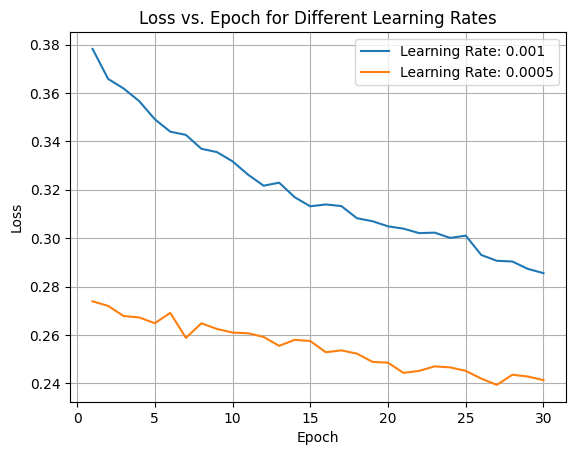

In [6]:
from helper import visualise_loss

save_dir = "models/alexnet_30epochs_latest/"
model_path = os.path.join(save_dir, f'train_losses.pt')  # Change the filename accordingly
visualise_loss(model_path)

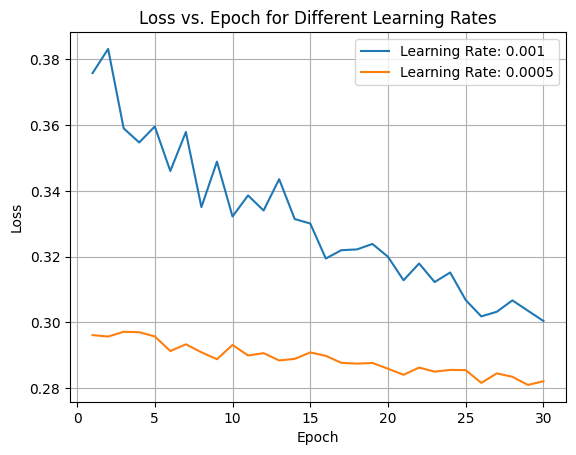

In [7]:
save_dir = "models/alexnet_30epochs_latest/"
model_path = os.path.join(save_dir, f'valid_losses.pt')  # Change the filename accordingly
visualise_loss(model_path)

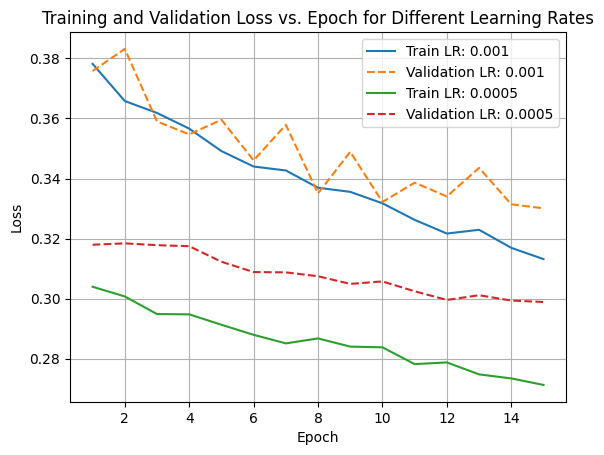

In [3]:
import os
from helper import visualise_all_loss
save_dir = "models/alexnet_variation_BCELoss/"
train_model_path = os.path.join(save_dir, f'train_losses.pt')
valid_model_path = os.path.join(save_dir, f'valid_losses.pt')

visualise_all_loss(train_model_path, valid_model_path)